# 2.2 Assignment – Banknote EDA
My goal in this lab for exploring the Banknote Authentication dataset. I will check class balance, make two scatterplots with class colors, look at correlations with a heatmap, and answer the reflection questions briefly in my own words. This prepares the data for later classification.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots readable
plt.rcParams["figure.figsize"] = (6, 4.5)
plt.style.use("seaborn-v0_8-whitegrid")

# Absolute path (as requested)
FILE_PATH = r"C:\Users\MasterDanteDev86\Downloads\CAP350-O Deep Learning - Online\W1\DPL\data\banknote-auth.csv"

# Load
df = pd.read_csv(FILE_PATH)

print("Dataset loaded successfully!\n")
print("Shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))
print("\nInfo:")
print(df.info())

Dataset loaded successfully!

Shape: (1372, 5)

First 10 rows:
   variance  skewness  kurtosis  entropy  label
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   label     1372 non-null   int64  
dtypes: float64(4), int

**Columns** (from the printout above):
- `variance`, `skewness`, `kurtosis`, `entropy` (numeric features)
- `label` (`class`) (0 = authentic, 1 = counterfeit)

I will clean header names, detect the label column, and confirm its unique values.

In [61]:
# Normalize header names to avoid KeyErrors like 'class' vs 'Class' vs 'label'
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Columns after normalization:", df.columns.tolist())

# Pick the label column safely
if "class" in df.columns:
    label_col = "class"
elif "label" in df.columns:
    label_col = "label"
else:
    # assume the last column is the label
    label_col = df.columns[-1]
    print(f"(Guessed label column: {label_col})")

print(f"Using '{label_col}' as the label column.")
print("Unique label values:", sorted(pd.unique(df[label_col])))

Columns after normalization: ['variance', 'skewness', 'kurtosis', 'entropy', 'label']
Using 'label' as the label column.
Unique label values: [0, 1]


I will count how many **authentic (0)** vs **counterfeit (1)** notes we have and plot a simple bar chart. This checks if the dataset is balanced.


Class Distribution:
label
0    762
1    610
Name: count, dtype: int64


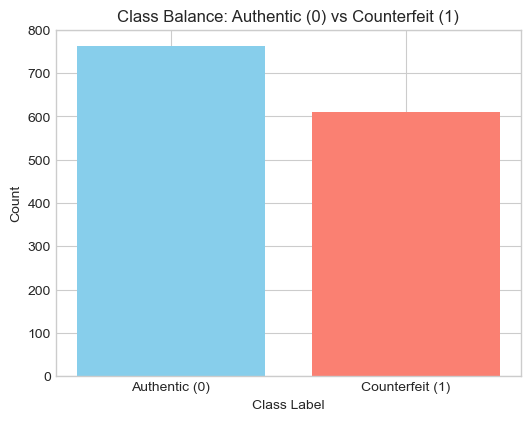

In [64]:
# Count classes
class_counts = df[label_col].value_counts().sort_index()

print("\nClass Distribution:")
print(class_counts)

# Bar chart
plt.bar(class_counts.index.astype(str), class_counts.values, color=["skyblue", "salmon"])
plt.title("Class Balance: Authentic (0) vs Counterfeit (1)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks([0, 1], ["Authentic (0)", "Counterfeit (1)"])
plt.show()

The two bars look fairly even, so the dataset appears **balanced**. That’s good for training later since models won’t be biased to one class.

I will make **two different scatterplots**
1) `variance` vs `skewness`  
2) `kurtosis` vs `entropy`


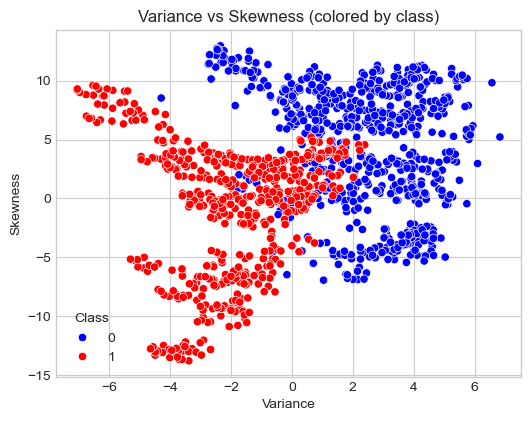

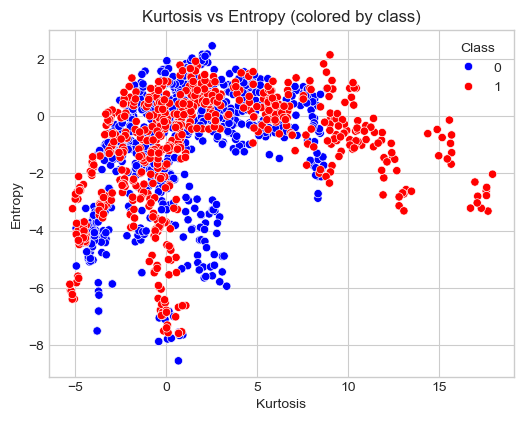

In [68]:
# Scatter 1: variance vs skewness
sns.scatterplot(
    data=df, x="variance", y="skewness",
    hue=label_col, palette={0: "blue", 1: "red"}
)
plt.title("Variance vs Skewness (colored by class)")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.legend(title="Class")
plt.show()

# Scatter 2: kurtosis vs entropy
sns.scatterplot(
    data=df, x="kurtosis", y="entropy",
    hue=label_col, palette={0: "blue", 1: "red"}
)
plt.title("Kurtosis vs Entropy (colored by class)")
plt.xlabel("Kurtosis")
plt.ylabel("Entropy")
plt.legend(title="Class")
plt.show()

**Variance vs skewness** looks like the best separator. The two colors don’t overlap much there.  
The **kurtosis vs entropy** plot has more overlap, but still shows some pattern.


The **correlation matrix** and **heatmap**. This checks for strong relationships (collinearity) among the four features.



Correlation Matrix:

          variance  skewness  kurtosis   entropy     label
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
kurtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
label    -0.724843 -0.444688  0.155883 -0.023424  1.000000


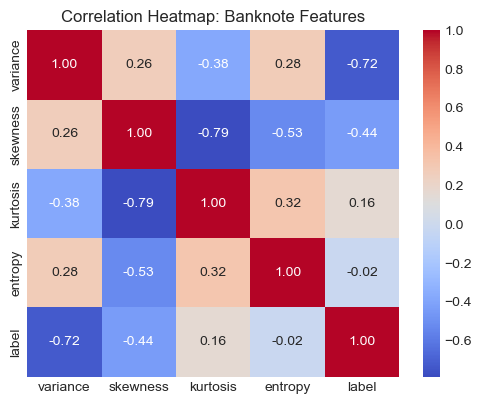

In [72]:
# Correlation of numeric columns
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n")
print(corr)

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Banknote Features")
plt.show()

- **Variance** and **skewness** have a strong negative correlation.
- **Entropy** looks weakly related to the others.
- No features are near ±1 together, so strong collinearity is not a big issue here.


In [75]:
# =========================================================
# Reflection
# =========================================================

# 1) How balanced are the two classes?
#    Pretty balanced, the bar chart showed similar counts for 0 and 1.

# 2) Which feature pair shows the best separation?
#    Variance vs skewness looked the cleanest split between the two colors.

# 3) Does the data appear linearly separable?
#    Yes, roughly. A straight line could probably do a decent job in the first plot.

# 4) How do you think an MLP will do against a Perceptron on this data?
#    MLP might do a little better since it can learn curved boundaries,
#    but the Perceptron should already do well because the data looks close to separable.
